# Reconstruct and visualize Embedding


In [1]:
from hype.util.reconstruct import Reconstruct

model_filename = './data/olp_goals_connected.pth.best'
emb_filename = './data/olp_goals_connected_lorentz2D_emb.csv'
graph_filename = './data/olp_goals_connected.csv'

# reconstruct from learning file (.pth)
recon = Reconstruct()
recon.reconstruction(model_filename)
recon.load_files(recon.get_embedding_filename(), graph_filename)

# load reconstruction data
recon2 = Reconstruct.fromFiles(emb_filename, graph_filename)


100%|██████████| 274/274 [00:00<00:00, 1454.32it/s]


Mean rank: 1.7695244706699063, mAP rank: 0.9157595118049228, time: 0.1913259949978965
Manifold: lorentz, dim: 4


# Visualize Poincare Embedding

### Visualize Mammal Data

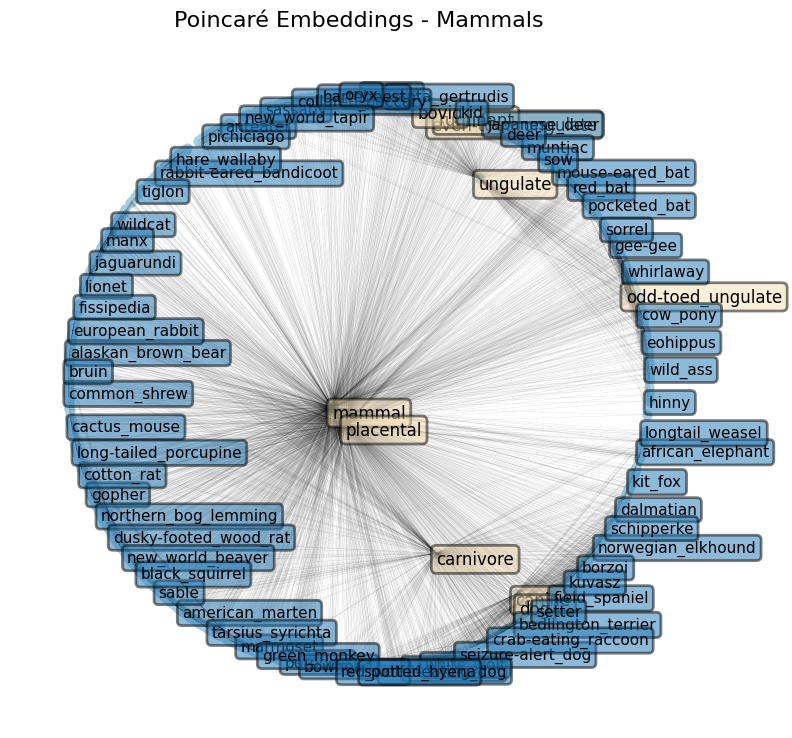

In [5]:
from hype.util.visualize import *

my_new_dict = load_embedding('./mammals2D.csv')


cluster_fit = [0 for i in range(len(my_new_dict))]
node_names = list(my_new_dict.keys())
my_label_dict = {}
for i in range(len(my_new_dict)):
    my_label_dict[node_names[i]] = np.argmax(cluster_fit[i])


graph_filename = './wordnet/mammal_closure.csv'

my_graph = pandas.read_table(graph_filename, delimiter=',')


plot_embedding2D(my_new_dict, my_label_dict, my_graph, 0.001, 1, 'Poincaré Embeddings - Mammals', save_fig=True, save_filename='./images/mammals2D.png', plot_edge=True)

### Visualize OLP Data

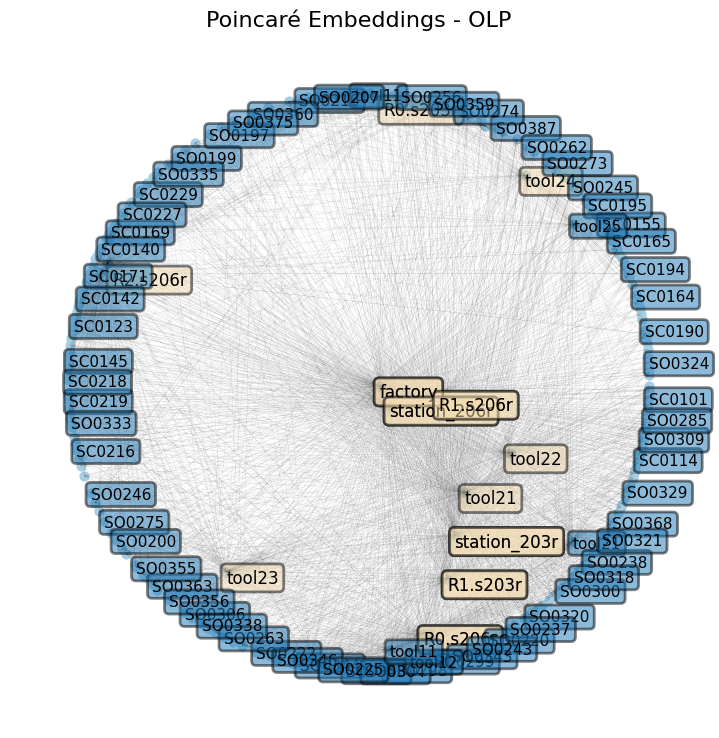

In [6]:
from hype.util.visualize import *
# my_new_dict = load_embedding('./data/olp_goals_poincare2D_emb.csv')
# my_new_dict = load_embedding('./data/olp_goals_lorentz2D_emb.csv')
# my_new_dict = load_embedding('./data/olp_goals_sep_lorentz2D_emb.csv')
my_new_dict = load_embedding('./data/olp_goals_connected_lorentz2D_emb.csv')


cluster_fit = [0 for i in range(len(my_new_dict))]
node_names = list(my_new_dict.keys())
my_label_dict = {}
for i in range(len(my_new_dict)):
    my_label_dict[node_names[i]] = np.argmax(cluster_fit[i])


graph_filename = './data/olp_goals_connected.csv'
my_graph = pandas.read_table(graph_filename, delimiter=',')

# to visualize tools, stations, robots
ig_filename = './data/olp_goals_ig.csv'
ig = pandas.read_csv(ig_filename)
plot_embedding2D(my_new_dict, my_label_dict, my_graph, 0.001, 1, 'Poincaré Embeddings - OLP', save_fig=True, 
                 save_filename='./images/olp2D.png', plot_edge=True, groups=list(ig['id']))


In [9]:
ig_filename = './data/olp_goals_ig.csv'
ig = pandas.read_csv(ig_filename)
display(list(ig['id']))

['factory',
 'R0.station_203r',
 'station_203r',
 'R1.station_203r',
 'R0.station_206r',
 'station_206r',
 'R1.station_206r',
 'R2.station_206r']

In [18]:
display(my_new_dict)
l_manifold = MANIFOLDS['poincare']()

node_keys = list(my_new_dict.keys())
dist_origin = l_manifold.distance(th.Tensor(np.array([0, 0])), th.Tensor(np.array(list(my_new_dict.values())))).numpy()



{'SO0196': array([0.87065292, 0.4918947 ]),
 'tool11.R0.station_203r': array([0.83854794, 0.54087318]),
 'R0.station_203r': array([0.83618538, 0.51165052]),
 'station_203r': array([-0.69818587, -0.39010981]),
 'factory': array([-0.16746836,  0.11715598]),
 'tool12.R0.station_203r': array([0.73877556, 0.67299107]),
 'tool13.R0.station_203r': array([0.9776496, 0.1954333]),
 'tool14.R0.station_203r': array([0.86778403, 0.48557752]),
 'tool15.R0.station_203r': array([0.92761512, 0.3611544 ]),
 'tool16.R0.station_203r': array([0.70454535, 0.70193836]),
 'tool18.R0.station_203r': array([0.95444417, 0.27321874]),
 'tool21.R1.station_203r': array([-0.44192524, -0.8360884 ]),
 'R1.station_203r': array([-0.7787344 , -0.40127114]),
 'tool22.R1.station_203r': array([-0.88131389, -0.44892826]),
 'tool23.R1.station_203r': array([-0.93254606, -0.35210746]),
 'SO0197': array([0.28854418, 0.95745486]),
 'SO0198': array([0.48461244, 0.87472783]),
 'SO0199': array([-0.08444397,  0.99642696]),
 'SO0200': 

In [19]:
x_coord = np.array(list(my_new_dict.values()))
df2 = pandas.DataFrame({'id': node_keys, 'x0': x_coord[:, 0], 'x1': x_coord[:, 1], 'distance': dist_origin})

In [20]:
sorted_df2 = df2.sort_values(by='distance')

print(sorted_df2.to_string())

                         id        x0        x1   distance
4                   factory -0.167468  0.117156   0.414599
171         R1.station_206r -0.215588  0.088115   0.474508
169            station_206r -0.251893  0.151491   0.605744
170  tool21.R1.station_206r -0.757791  0.125652   2.031539
3              station_203r -0.698186 -0.390110   2.196007
172  tool22.R1.station_206r -0.794424  0.237755   2.371386
12          R1.station_203r -0.778734 -0.401271   2.716958
173  tool23.R1.station_206r -0.808076  0.461613   3.326149
195  tool25.R1.station_206r  0.926753 -0.172770   3.523882
11   tool21.R1.station_203r -0.441925 -0.836088   3.578786
168         R0.station_206r -0.693520 -0.647088   3.633657
167  tool13.R0.station_206r -0.764246 -0.579477   3.869024
198  tool24.R1.station_206r  0.491115  0.824003   3.873038
178         R2.station_206r -0.207154  0.938854   3.929121
194  tool11.R0.station_206r -0.718736 -0.650720   4.169320
196  tool33.R2.station_206r -0.193278  0.957216   4.4335

In [31]:
df3 = pandas.read_csv('./data/olp_goals_weighted.csv', usecols=['id1', 'id2', 'weight'], engine='c')
df3.dropna(inplace=True)

# display(df3)
idx, objects = pandas.factorize(df3[['id1', 'id2']].values.reshape(-1))
idx = idx.reshape(-1, 2).astype('int')
weights = df3.weight.values.astype('float')
display(idx)
display(objects.tolist())
display(weights)

array([[  0,   1],
       [  1,   2],
       [  2,   3],
       ...,
       [165, 173],
       [165, 198],
       [165, 195]])

['SO0196',
 'tool11.R0.station_203r',
 'R0.station_203r',
 'station_203r',
 'factory',
 'tool12.R0.station_203r',
 'tool13.R0.station_203r',
 'tool14.R0.station_203r',
 'tool15.R0.station_203r',
 'tool16.R0.station_203r',
 'tool18.R0.station_203r',
 'tool21.R1.station_203r',
 'R1.station_203r',
 'tool22.R1.station_203r',
 'tool23.R1.station_203r',
 'SO0197',
 'SO0198',
 'SO0199',
 'SO0200',
 'tool24.R1.station_203r',
 'SO0201',
 'SO0202',
 'SO0204',
 'SO0205',
 'SO0207',
 'SO0208',
 'SO0210',
 'SO0211',
 'SO0212',
 'SO0213',
 'SO0216',
 'SO0218',
 'SO0219',
 'SO0220',
 'SO0223',
 'SO0224',
 'SO0225',
 'SO0226',
 'SO0228',
 'SO0229',
 'SO0230',
 'SO0231',
 'SO0232',
 'SO0234',
 'SO0235',
 'SO0237',
 'SO0238',
 'SO0239',
 'SO0240',
 'SO0241',
 'SO0242',
 'SO0243',
 'SO0244',
 'SO0245',
 'SO0246',
 'SO0247',
 'SO0248',
 'SO0249',
 'SO0250',
 'SO0251',
 'SO0252',
 'SO0253',
 'SO0254',
 'SO0256',
 'SO0257',
 'SO0259',
 'SO0260',
 'SO0261',
 'SO0262',
 'SO0265',
 'SO0266',
 'SO0267',
 'SO026

array([1., 2., 3., ..., 1., 1., 1.])

In [46]:
display(my_graph)
print(my_graph['id1'][33].split('-')[0])

teststr = 'SO0201'
print(teststr.split('-')[0])

,id1,id2,weight
0,SO0196-0,tool11.R0.station_203r,1
1,tool11.R0.station_203r,R0.station_203r,1
2,R0.station_203r,station_203r,1
3,station_203r,factory,1
4,SO0196-1,tool12.R0.station_203r,1
...,...,...,...
1569,SO0387-3,tool21.R1.station_206r,1
1570,SO0387-4,tool22.R1.station_206r,1
1571,SO0387-5,tool23.R1.station_206r,1
1572,SO0387-6,tool24.R1.station_206r,1


SO0201
SO0201


In [7]:
aaa = my_new_dict[my_graph['id1'][33]]
print(aaa)
print(aaa[0], aaa[1])
my_graph.keys()

[-0.96346544 -0.20315307]
-0.9634654395532357 -0.20315306518792334


Index(['id1', 'id2', 'weight'], dtype='object')

In [9]:
display(my_new_dict)


{'SO0196-0': array([-0.52701702,  0.84058153]),
 'tool11.R0.station_203r': array([-0.52720832,  0.83994825]),
 'R0.station_203r': array([-0.20333125, -0.04368277]),
 'station_203r': array([-0.06622614, -0.01638577]),
 'factory': array([-0.00739239,  0.15039338]),
 'SO0196-1': array([ 0.58933447, -0.78344564]),
 'tool12.R0.station_203r': array([ 0.58749247, -0.78377853]),
 'SO0196-2': array([-0.9635324 , -0.20332663]),
 'tool13.R0.station_203r': array([-0.96347607, -0.20327142]),
 'SO0196-3': array([-0.46596756, -0.87719049]),
 'tool14.R0.station_203r': array([-0.46110495, -0.87509982]),
 'SO0196-4': array([-0.82202091,  0.5345446 ]),
 'tool15.R0.station_203r': array([-0.82184908,  0.5347311 ]),
 'SO0196-5': array([0.92391981, 0.3582241 ]),
 'tool16.R0.station_203r': array([0.92378439, 0.35936083]),
 'SO0196-6': array([-0.7098072 , -0.69330287]),
 'tool18.R0.station_203r': array([-0.69848707, -0.69228094]),
 'SO0196-7': array([-0.87255662, -0.39122781]),
 'tool21.R1.station_203r': array

True

## high dimensional data
### calculate distance from center

In [2]:
sorted_df = recon.sort_by_distance()
display(sorted_df)


,node,0,1,2,3,4,distance
4,factory,1.000971,0.005179,-0.015324,0.035688,0.020181,0.044061
169,station_206r,1.075867,0.267618,-0.193772,-0.217845,0.029429,0.387109
171,R1.station_206r,1.287114,0.094570,-0.753006,-0.222554,-0.176549,0.740727
170,tool21.R1.station_206r,4.617798,2.629041,-3.640718,-0.394120,0.045297,2.211130
3,station_203r,5.184497,-1.576215,0.185641,4.832619,-0.076737,2.329387
...,...,...,...,...,...,...,...
67,SO0261,61536.148353,-46110.104879,27334.312749,15145.958722,-26153.222788,11.720528
23,SO0205,64295.090770,-47862.047185,28405.594341,24608.909175,-20751.070689,11.764386
31,SO0218,69395.613153,-47649.137370,43056.713418,17033.375383,-20032.333475,11.840726
22,SO0204,71780.747690,-48553.897409,38507.447928,27893.072885,-23111.636103,11.874518


In [31]:
node_dist_df = sorted_df[['node', 'distance']]

with open('./data/distance/test_filename.txt', 'w') as fo:
    fo.write(node_dist_df.to_string())

In [3]:
from hype.util.reconstruct import HypType

recon.convert_manifold(HypType.Poincare)

sorted_pc_df = recon.sort_by_distance()
display(sorted_pc_df)
node_dist_pc_df = sorted_pc_df[['node', 'distance']]
display(node_dist_pc_df)

(275, 5)


,node,0,1,2,3,4,distance
4,factory,1.000971,0.005179,-0.015324,0.035688,0.020181,0.044061
169,station_206r,1.075867,0.267618,-0.193772,-0.217845,0.029429,0.387109
171,R1.station_206r,1.287114,0.094570,-0.753006,-0.222554,-0.176549,0.740727
170,tool21.R1.station_206r,4.617798,2.629041,-3.640718,-0.394120,0.045297,2.211130
3,station_203r,5.184497,-1.576215,0.185641,4.832619,-0.076737,2.329387
...,...,...,...,...,...,...,...
76,SO0272,61323.750350,-40006.139710,23900.548000,37774.198959,-12727.326498,11.719192
23,SO0205,64295.090770,-47862.047185,28405.594341,24608.909175,-20751.070689,11.766061
31,SO0218,69395.613153,-47649.137370,43056.713418,17033.375383,-20032.333475,11.839727
22,SO0204,71780.747690,-48553.897409,38507.447928,27893.072885,-23111.636103,11.875484


,node,distance
4,factory,0.044061
169,station_206r,0.387109
171,R1.station_206r,0.740727
170,tool21.R1.station_206r,2.211130
3,station_203r,2.329387
...,...,...
76,SO0272,11.719192
23,SO0205,11.766061
31,SO0218,11.839727
22,SO0204,11.875484


In [3]:
from hype.util.reconstruct import Reconstruct

model_filename = './data/olp_goals_connected.pth.best'
recon = Reconstruct()
recon.reconstruction(model_filename)

100%|██████████| 274/274 [00:00<00:00, 1415.13it/s]

Mean rank: 1.7313432835820894, mAP rank: 0.9171994625469334, time: 0.19544646100007412
Manifold: lorentz, dim: 4


In [19]:
filename = './data/olp_goals_connected_lorentz4D_emb.csv'
dz_df = calc_distances_from_zero(filename)
sorted_df = dz_df.sort_values(by='distance')
print(sorted_df.to_string())

# sorted_df.to_csv('./data/distance/olp_goals_connected_lorentz4D_distance.txt', index=False, sep=' ')
with open('./data/distance/test_filename.txt', 'w') as fo:
    fo.write(sorted_df.to_string())

                         id   distance
4                   factory   0.044061
169            station_206r   0.387109
171         R1.station_206r   0.740727
170  tool21.R1.station_206r   2.211130
3              station_203r   2.329387
172  tool22.R1.station_206r   2.374214
12          R1.station_203r   2.754377
173  tool23.R1.station_206r   3.219682
11   tool21.R1.station_203r   3.658412
195  tool25.R1.station_206r   3.682440
178         R2.station_206r   3.724505
168         R0.station_206r   3.737309
167  tool13.R0.station_206r   3.816611
198  tool24.R1.station_206r   3.842986
194  tool11.R0.station_206r   4.053149
196  tool33.R2.station_206r   4.177764
177  tool32.R2.station_206r   4.228039
2           R0.station_203r   4.710375
13   tool22.R1.station_203r   4.892203
265  tool12.R0.station_206r   5.192772
183  tool31.R2.station_206r   5.440062
10   tool18.R0.station_203r   5.571913
9    tool16.R0.station_203r   5.579391
7    tool14.R0.station_203r   5.742571
14   tool23.R1.station_20